In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://github.com/srinivasav22/Graduate-Admission-Prediction/raw/master/Admission_Predict_Ver1.1.csv'
data = pd.read_csv(url)

In [ ]:
# Drop the 'Serial No.' column
data = data.drop('Serial No.', axis=1)

In [ ]:
# Prepare the features (X) and target (y)
X = data.drop('Chance of Admit ', axis=1)
y = data['Chance of Admit ']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=92)


In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(42)


In [ ]:

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.layers.LeakyReLU()),
    tf.keras.layers.Dense(50, activation=tf.keras.layers.LeakyReLU()),
    tf.keras.layers.Dense(25, activation=tf.keras.layers.LeakyReLU()),
    tf.keras.layers.Dense(1)  # No activation for output layer in regression
])


In [ ]:
# Compile the model
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=70, verbose=1, validation_data=(X_test, y_test))


Epoch 1/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 770.7642 - mae: 23.7572 - val_loss: 0.2736 - val_mae: 0.4375
Epoch 2/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 59.0507 - mae: 6.2951 - val_loss: 2.3455 - val_mae: 1.4993
Epoch 3/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.7876 - mae: 4.1699 - val_loss: 3.3780 - val_mae: 1.8170
Epoch 4/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.1988 - mae: 2.8306 - val_loss: 3.9117 - val_mae: 1.9534
Epoch 5/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1968 - mae: 1.9222 - val_loss: 2.4563 - val_mae: 1.5431
Epoch 6/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5627 - mae: 1.1395 - val_loss: 0.8174 - val_mae: 0.8567
Epoch 7/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4412 - mae: 0.5740 - val_loss: 0.0852 - val_mae: 0.2357
Epoch 8/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1261 - mae: 0.2878 - val_loss: 0.1140 - val_mae: 0.2704
Epoch 9/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1149 -

In [ ]:

# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0301 - mae: 0.1383 
Test Loss: 0.029593495652079582, Test MAE: 0.13958166539669037


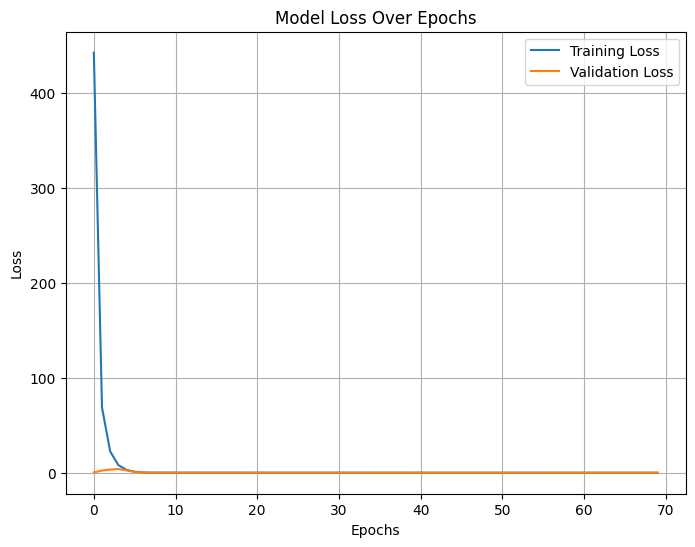

In [ ]:

# Plot the training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()